<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/basicSuperRestoration/tests/BasicSR_inference_DFDNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href=https://github.com/xinntao/BasicSR><img src="https://raw.githubusercontent.com/xinntao/BasicSR/master/assets/basicsr.png" width="400"></a>

# DFDNet - Blind Face Restoration - Inference Demo

[[paper]](https://arxiv.org/abs/2008.00418)  [[official codes]](https://github.com/csxmli2016/DFDNet)

In this colab notebook, we will show how to perform blind face face restoration with DFDNet.<br>

Note that <br>
1. The codes are improved compared to the [official DFDNet codes](https://github.com/csxmli2016/DFDNet)
  
  i. The codes are more compact and clean.<br>
  ii. Support multiple faces processing in one image

2. We try to align to the official codes. But there are still **some slight**
differences:
  
  i. We use [dlib](https://github.com/davisking/dlib) for 68 landmark detection<br>
  ii. The used image package are different (especially for reading and writing) 

Enjoy!

# Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**


## Git clone [BasicSR](https://github.com/xinntao/BasicSR) repo

In [ ]:
!rm -rf BasicSR
!git clone https://github.com/xinntao/BasicSR.git
%cd BasicSR

Cloning into 'BasicSR'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 4210 (delta 0), reused 0 (delta 0), pack-reused 4198
Receiving objects: 100% (4210/4210), 2.42 MiB | 27.28 MiB/s, done.
Resolving deltas: 100% (2541/2541), done.
/content/BasicSR


## Set up the enviroment

In [ ]:
# Install pytorch
!pip install torch torchvision

# Check torch and cuda versions
import torch
print('Torch Version: ', torch.__version__)
print('CUDA Version: ', torch.version.cuda)
print('CUDNN Version: ', torch.backends.cudnn.version())
print('CUDA Available:', torch.cuda.is_available())

Torch Version:  1.7.0+cu101
CUDA Version:  10.1
CUDNN Version:  7603
CUDA Available: True


In [ ]:
# Install requirements
!pip install -r requirements.txt
# DFDNet requires dlib: https://github.com/davisking/dlib
!pip install dlib
# Install BasicSR without cuda extentions
!python setup.py develop

running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing requirements to basicsr.egg-info/requires.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
writing manifest file 'basicsr.egg-info/SOURCES.txt'
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running build_ext
Creating /usr/local/lib/python3.6/dist-packages/basicsr.egg-link (link to .)
basicsr 1.1.1+c0ba07d is already the active version in easy-install.pth

Installed /content/BasicSR
Processing dependencies for basicsr==1.1.1+c0ba07d
Searching for yapf==0.30.0
Best match: yapf 0.30.0
Adding yapf 0.30.0 to easy-install.pth file
Install

## Download pretrained models

In [ ]:
!python scripts/download_pretrained_models.py DFDNet
!python scripts/download_pretrained_models.py dlib

Download 3.0 GB / 3.0 GB: : 97597chunk [00:49, 1985.04chunk/s]
Download 433.5 MB / 433.2 MB: : 13872chunk [00:11, 1212.44chunk/s]
Download 736.0 KB / 712.8 KB: 100% 23/23 [00:00<00:00, 3702.23chunk/s]
Download 8.8 MB / 8.7 MB: 100% 280/280 [00:00<00:00, 2513.48chunk/s]
Download 95.1 MB / 95.1 MB: : 3044chunk [00:00, 3221.34chunk/s]


## Download demo images
We use the images from [childhood-celebrities-when-they-were-young-kids](https://www.boredpanda.com/childhood-celebrities-when-they-were-young-kids/).

In [ ]:
!mkdir datasets/childhood
!wget https://static.boredpanda.com/blog/wp-content/uploads/2017/03/childhood-celebrities-when-they-were-young-kids-101-58bd73a65dee9__700.jpg -O datasets/childhood/Adele.jpg
!wget https://static.boredpanda.com/blog/wp-content/uploads/2017/03/childhood-celebrities-when-they-were-young-kids-4-58b80eeeefa13__700.jpg -O datasets/childhood/Julia_Roberts.jpg

--2020-11-29 05:18:53--  https://static.boredpanda.com/blog/wp-content/uploads/2017/03/childhood-celebrities-when-they-were-young-kids-101-58bd73a65dee9__700.jpg
Resolving static.boredpanda.com (static.boredpanda.com)... 13.249.43.16, 13.249.43.11, 13.249.43.129, ...
Connecting to static.boredpanda.com (static.boredpanda.com)|13.249.43.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69982 (68K) [image/jpeg]
Saving to: ‘datasets/childhood/Adele.jpg’

datasets/childhood/ 100%[===================>]  68.34K  --.-KB/s    in 0.001s  

2020-11-29 05:18:53 (70.8 MB/s) - ‘datasets/childhood/Adele.jpg’ saved [69982/69982]

--2020-11-29 05:18:53--  https://static.boredpanda.com/blog/wp-content/uploads/2017/03/childhood-celebrities-when-they-were-young-kids-4-58b80eeeefa13__700.jpg
Resolving static.boredpanda.com (static.boredpanda.com)... 13.249.43.16, 13.249.43.11, 13.249.43.129, ...
Connecting to static.boredpanda.com (static.boredpanda.com)|13.249.43.16|:443... con

# Inference with DFDNet



In [ ]:
!python inference/inference_dfdnet.py --upscale_factor 1 --test_path datasets/childhood/ --official_adaption True

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
Processing Adele.jpg image ...
	Detect 2 faces, 2 landmarks.
	Detect 2 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...
Processing Julia_Roberts.jpg image ...
	Detect 2 faces, 2 landmarks.
	Detect 2 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...

All results are saved in results/DFDNet/childhood


# Show results


In [ ]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('DFDNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

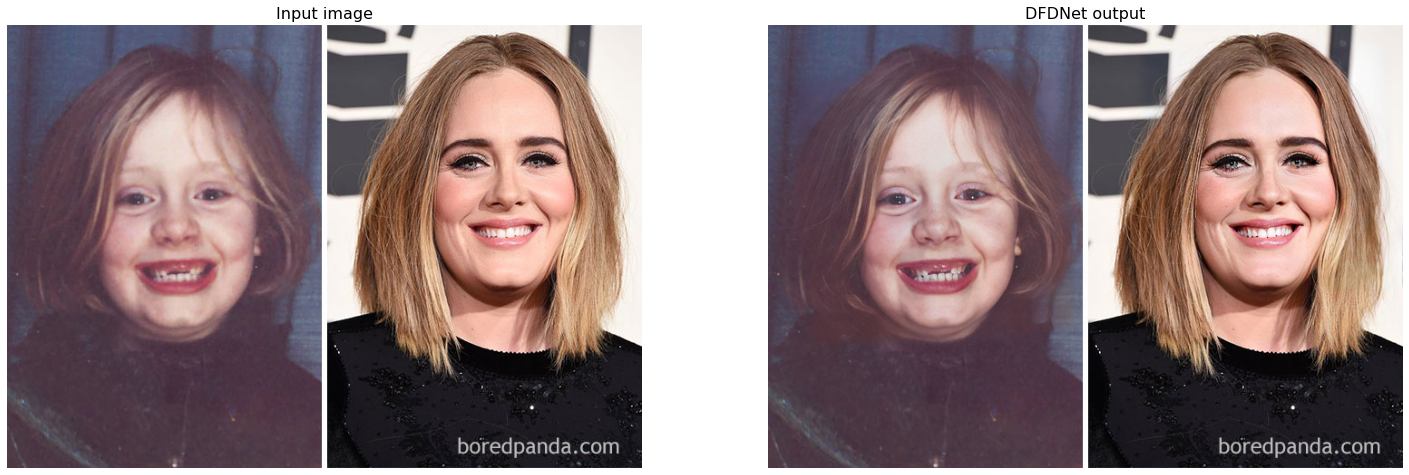

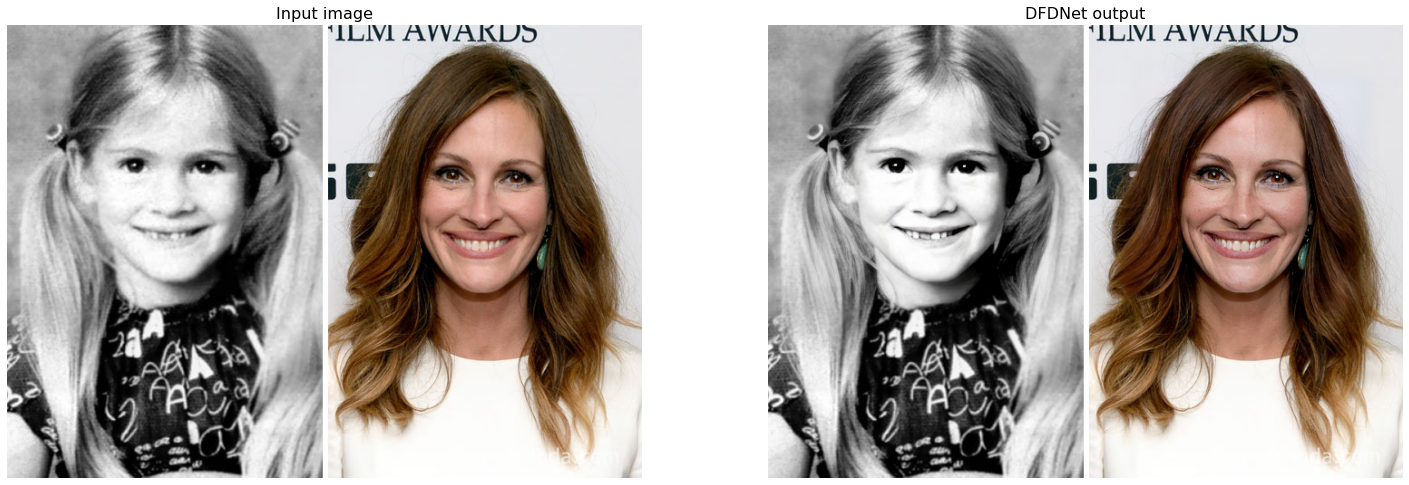

In [ ]:
import os
import glob

input_folder = 'datasets/childhood/'
result_folder = 'results/DFDNet/childhood/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


# Try it on uploaded images

## 1. Upload images

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'datasets/upload'
result_folder = 'results/DFDNet/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving 00008_00.png to 00008_00.png
move 00008_00.png to datasets/upload/00008_00.png


## 2. Inference

In [ ]:
# inference
!python inference/inference_dfdnet.py --upscale_factor 1 --test_path datasets/upload/ --official_adaption True

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
Processing 00008_00.png image ...
	Detect 1 faces, 1 landmarks.
	Detect 1 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...

All results are saved in results/DFDNet/upload


## 3. Visualize (Optional)

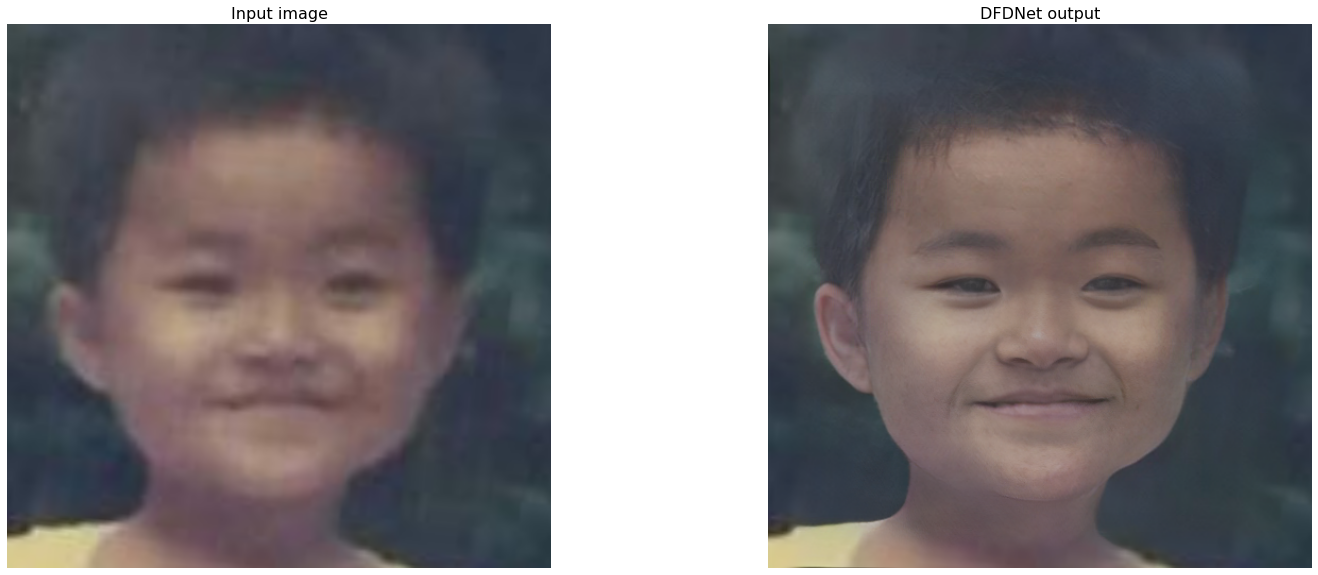

In [ ]:
# visualize
import os
import glob

result_folder = 'results/DFDNet/upload/final_results'
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 4. Download results

In [ ]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")

Download results/DFDNet/upload/final_results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>